In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'shai-training-2024-a-level-2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F75492%2F8320480%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240511%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240511T161223Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2b9283bb82a5e378b3a851395f39afd4de9514fec116d3e2ef2d4834f01c67b095f4734e661813c1ab41e163659cabe6bd10f9ab60e607a030c37ec42a492b779f437f7a8fe30c433eec94512af9e5883dfa8681ada7da0e54ccfdb08fab0abc99b4f05174f06b44e68a0fa861f0da69bcae842b9ea8e9c6b27f20fa2c4b06f05e14ab048f15a09b52ae24aeee5002ac68180cf2cad194ec6975676aed72390792a257153955abb295f5277d0fc159e8af11c18af3dccf18ecdd5a5e20d2c55024d9838f9166aa37fd3e21158608b48b82c45e9d48f9140e90d2a0241babe7f60fe9e3dc10cba885bf95dc8156fb62b3c1c2513a00cf253456950e20f4ceb0fb'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Embedding


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-05-11 15:34:29.096715: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-11 15:34:29.096813: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-11 15:34:29.223114: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/shai-training-2024-a-level-2/sample_submission.csv
/kaggle/input/shai-training-2024-a-level-2/Valid.csv
/kaggle/input/shai-training-2024-a-level-2/Train.csv
/kaggle/input/shai-training-2024-a-level-2/Test.csv


In [ ]:
train=pd.read_csv("/kaggle/input/shai-training-2024-a-level-2/Train.csv")
validate=pd.read_csv("/kaggle/input/shai-training-2024-a-level-2/Valid.csv")
test=pd.read_csv("/kaggle/input/shai-training-2024-a-level-2/Test.csv")

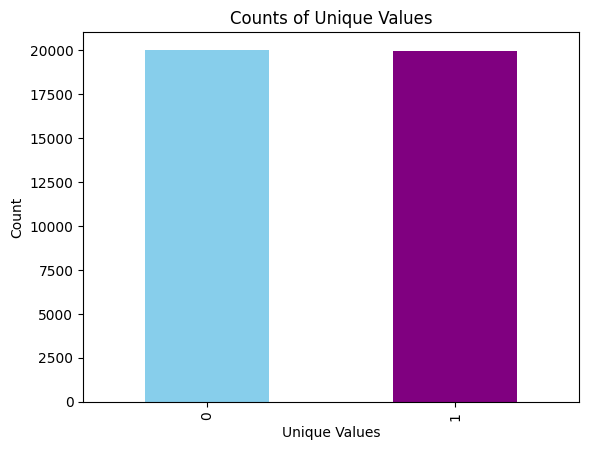

In [ ]:
colors = ['skyblue', 'purple']
train['label'].value_counts().plot(kind='bar', color=colors)
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Counts of Unique Values')
plt.show()

In [ ]:
print(f'the shape of our training data is --> {train.shape}')
print(f'the shape of our validation data is --> {validate.shape}')
print(f'the shape of our testing data is --> {test.shape}')

the shape of our training data is --> (40000, 2)
the shape of our validation data is --> (5000, 2)
the shape of our testing data is --> (5000, 3)


In [ ]:
print(f' train data columns -->  {train.columns}')
print(f' validate data columns -->  {validate.columns}')
print(f' test data columns -->  {test.columns}')

 train data columns -->  Index(['text', 'label'], dtype='object')
 validate data columns -->  Index(['text', 'label'], dtype='object')
 test data columns -->  Index(['id', 'text', 'label'], dtype='object')


In [ ]:
print(f'the number of unique values in the training data is --> {train["text"].nunique()}')

the number of unique values in the training data is --> 39723


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def remove_capitalization(text):
    tokens = word_tokenize(text)
    lowercase_tokens = [token.lower() for token in tokens]
    return ' '.join(lowercase_tokens)

train['text'] =train['text'] .apply(remove_capitalization)
test['text'] =test['text'] .apply(remove_capitalization)
validate['text'] =validate['text'] .apply(remove_capitalization)

train.head()

,text,label
0,i grew up ( b . 1965 ) watching and loving the...,0
1,"when i put this movie in my dvd player , and s...",0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [ ]:
def clean_url(text):
    text = re.sub(r"((https:|http|ftp)?(:\/\/)?(www\.)?)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&\/\/=]*)",' ',text)
    return re.sub(r'/', ' / ', text)

train['text'] = train['text'].apply(clean_url)
validate['text'] =validate['text'].apply(clean_url)
test['text'] =test['text'].apply(clean_url)

In [ ]:
english_stopwords = set(stopwords.words('english'))

# Function to remove stopwords while preserving negations
def remove_stopwords_without_negation(text):
    words = text.split()
    filtered_words = []
    skip_next = False  # Flag to skip next word after a negation
    for i, word in enumerate(words):
        if skip_next:
            skip_next = False
            filtered_words.append(word)
            continue
        if word.lower() in english_stopwords:
            if i > 0 and words[i - 1].lower() in ['not', "n't"]:
                filtered_words.append(word)
            else:
                continue
        else:
            filtered_words.append(word)
    return " ".join(filtered_words)

train['text'] = train['text'].apply(remove_stopwords_without_negation)
test['text'] =test['text'].apply(remove_stopwords_without_negation)
validate['text'] =validate['text'].apply(remove_stopwords_without_negation)

In [ ]:
def clean_punctuations(text):
    return ''.join(char for char in text if char not in string.punctuation)

train['text'] = train['text'].apply(clean_punctuations)
test['text'] =test['text'].apply(clean_punctuations)
validate['text'] =validate['text'].apply(clean_punctuations)

In [ ]:
def clean_numbers(text):
    return re.sub(r'\d+', '', text)

# Apply the function to the DataFrame column
train['text'] = train['text'].apply(clean_numbers)
test['text'] =test['text'].apply(clean_numbers)
validate['text'] =validate['text'].apply(clean_numbers)

In [ ]:
def clean_emoji(data):
    data = re.sub(r'<3', '<heart>', data)
    data = re.sub(r"[8:=;]['`\-]?[)d]+", '<smile>', data)
    data = re.sub(r"[8:=;]['`\-]?\(+", '<sad>', data)
    data = re.sub(r"[8:=;]['`\-]?[\/|l*]", '<neutral>', data)
    data = re.sub(r"[8:=;]['`\-]?p+", '<laugh>', data)
    return data
train['text'] = train['text'].apply(lambda x: clean_emoji(x))
test['text'] =test['text'].apply(lambda x: clean_emoji(x))
validate['text'] =validate['text'].apply(lambda x: clean_emoji(x))

In [ ]:
x_train=train["text"]
y_train=train["label"]

x_validate=validate["text"]
y_validate=validate["label"]

x_test=test["text"]
y_test=test["label"]

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)

tokenizer.fit_on_texts(x_validate)
validate_sequences = tokenizer.texts_to_sequences(x_validate)

tokenizer.fit_on_texts(x_test)
test_sequences = tokenizer.texts_to_sequences(x_test)


# Get vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the <UNK> token

# Define embedding dimension
embedding_dim = 100
# Pad sequences to ensure uniform length
max_sequence_length = 2470
sequences_train_padded = pad_sequences(train_sequences, maxlen=max_sequence_length)
sequences_validate_padded = pad_sequences(validate_sequences, maxlen=max_sequence_length)
sequences_test_padded = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Define your LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(sequences_train_padded, y_train,
                    epochs=20,
                    batch_size=41,
                    validation_data=(sequences_validate_padded, y_validate),
                    callbacks=[early_stopping])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
976/976 ━━━━━━━━━━━━━━━━━━━━ 127s 127ms/step - accuracy: 0.8032 - loss: 0.4145 - val_accuracy: 0.6220 - val_loss: 0.7898
Epoch 2/20
976/976 ━━━━━━━━━━━━━━━━━━━━ 124s 127ms/step - accuracy: 0.9526 - loss: 0.1352 - val_accuracy: 0.6106 - val_loss: 0.9894
Epoch 3/20
976/976 ━━━━━━━━━━━━━━━━━━━━ 124s 127ms/step - accuracy: 0.9786 - loss: 0.0663 - val_accuracy: 0.6076 - val_loss: 1.3177
Epoch 4/20
976/976 ━━━━━━━━━━━━━━━━━━━━ 124s 127ms/step - accuracy: 0.9854 - loss: 0.0469 - val_accuracy: 0.5950 - val_loss: 1.6025


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 2470, 100)      │    12,472,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,509,456 (143.09 MB)

 Trainable params: 12,503,151 (47.70 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,006,305 (95.39 MB)

In [ ]:
predictions=model.predict(sequences_test_padded)

157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_validate, binary_predictions))

              precision    recall  f1-score   support

           0       0.49      0.53      0.51      2486
           1       0.50      0.47      0.48      2514

    accuracy                           0.50      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       0.50      0.50      0.50      5000



In [ ]:
submission=test[["id"]]
submission

,id
0,0
1,1
2,2
3,3
4,4
...,...
4995,4995
4996,4996
4997,4997
4998,4998


In [ ]:
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

# Now 'binary_predictions' contains the binary classification results


In [ ]:
submission["label"]= binary_predictions

/tmp/ipykernel_34/2244223454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["label"]= binary_predictions


In [ ]:
submission.to_csv("submission_6.csv")